In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 데이터 로드 및 전처리
data = pd.read_csv('facility_data.csv')
data_cleaned = data.drop(columns=['Unnamed: 0', 'ID'])

# 범주형 변수 원-핫 인코딩
data_cleaned = pd.get_dummies(data_cleaned, columns=['COMPONENT_ARBITRARY'])

# 특성과 타겟 변수 분리
X = data_cleaned.drop(columns=['Y_LABEL'])
y = data_cleaned['Y_LABEL']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 신경망 모델 정의
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=2)

# 테스트 세트에서 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


c:\Users\owenc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
282/282 - 13s - 45ms/step - accuracy: 0.9130 - loss: 0.3069 - val_accuracy: 0.9229 - val_loss: 0.2464
Epoch 2/10
282/282 - 2s - 7ms/step - accuracy: 0.9277 - loss: 0.2437 - val_accuracy: 0.9313 - val_loss: 0.2263
Epoch 3/10
282/282 - 2s - 6ms/step - accuracy: 0.9357 - loss: 0.2190 - val_accuracy: 0.9379 - val_loss: 0.2122
Epoch 4/10
282/282 - 2s - 6ms/step - accuracy: 0.9380 - loss: 0.2094 - val_accuracy: 0.9415 - val_loss: 0.2025
Epoch 5/10
282/282 - 2s - 7ms/step - accuracy: 0.9419 - loss: 0.2049 - val_accuracy: 0.9441 - val_loss: 0.1939
Epoch 6/10
282/282 - 1s - 5ms/step - accuracy: 0.9455 - loss: 0.1926 - val_accuracy: 0.9464 - val_loss: 0.1887
Epoch 7/10
282/282 - 1s - 5ms/step - accuracy: 0.9477 - loss: 0.1859 - val_accuracy: 0.9468 - val_loss: 0.1887
Epoch 8/10
282/282 - 1s - 5ms/step - accuracy: 0.9478 - loss: 0.1816 - val_accuracy: 0.9486 - val_loss: 0.1826
Epoch 9/10
282/282 - 4s - 15ms/step - accuracy: 0.9504 - loss: 0.1770 - val_accuracy: 0.9495 - val_loss: 0.180

89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Accuracy: 0.9510464703795672
Test Precision: 0.9789473684210527
Test Recall: 0.40611353711790393
Test F1 Score: 0.5740740740740741
Test AUC: 0.8482406299000186


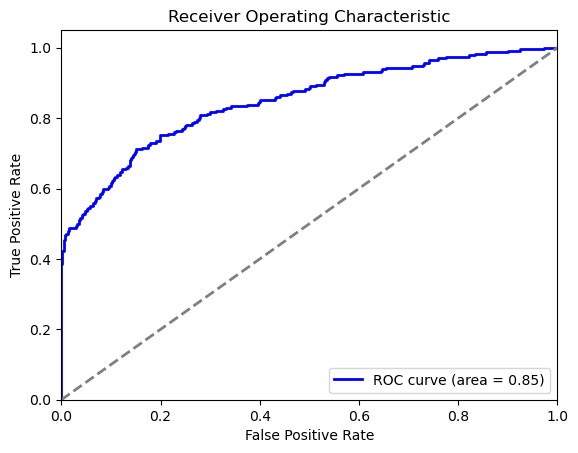

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 테스트 세트에서 모델 평가
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')
print(f'Test AUC: {test_auc}')

# ROC 곡선 출력
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()